In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = '/content/drive/MyDrive/Prak Big Data Analytics/Per-13/dataset_anemia.csv'

In [3]:
df = pd.read_csv(dataset)

In [4]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [5]:
df.shape

(1281, 15)

In [6]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [7]:
df.duplicated().sum()

49

In [8]:
# removing duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,7.846713,25.897658,77.591978,1.884341,5.130724,4.714294,12.187589,46.269150,85.734099,32.250877,31.739732,228.927922,14.340931,0.261623
std,3.552180,7.064941,150.651596,1.357362,2.895636,2.867519,3.863201,106.945982,27.663902,113.356653,3.354512,93.080258,3.053868,0.698735
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.000000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,70.775000,1.880760,5.000000,4.190000,10.800000,39.200000,81.000000,25.500000,30.500000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.200000,46.152600,86.550000,27.700000,32.000000,211.000000,14.312512,0.260280
75%,8.700000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.152600,90.200000,29.600000,32.900000,290.000000,14.800000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.000000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


<ipython-input-11-6a06b1c89ab5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Diagnosis', palette='viridis', width=0.6)


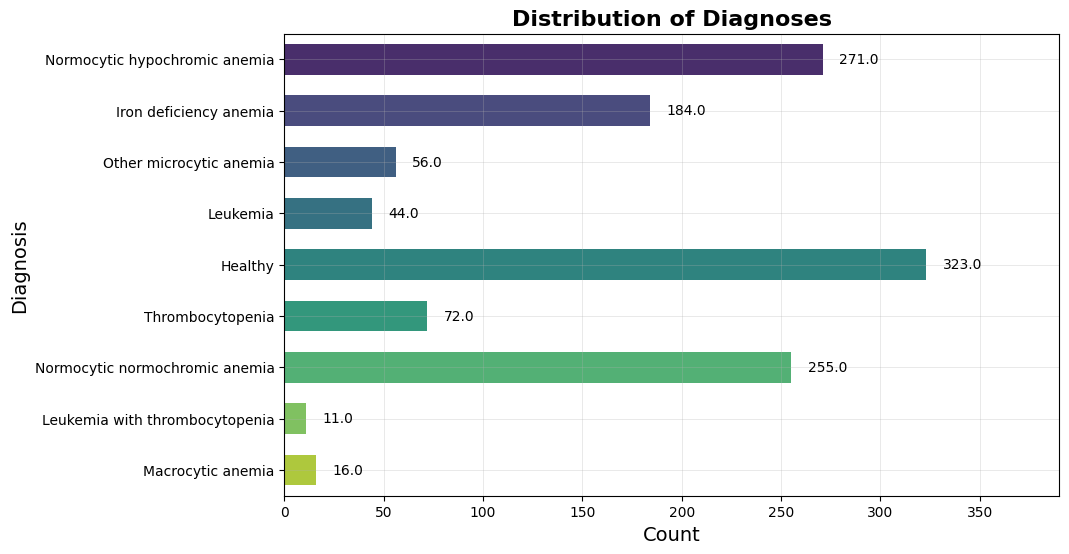

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Diagnosis', palette='viridis', width=0.6)

ax.set_title('Distribution of Diagnoses', fontsize=16, fontweight='bold')
ax.grid(linewidth=0.5, alpha=0.4)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Diagnosis', fontsize=14)
plt.xlim(0, 390)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(12, 0),
                textcoords='offset points')

plt.show()

In [12]:
label_encoder = LabelEncoder()

df['Diagnosis_encoded']  = label_encoder.fit_transform(df['Diagnosis'])
df = df.drop('Diagnosis', axis = 1)
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis_encoded
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


Text(0.5, 0.98, 'Display of Box and Whisker Chart')

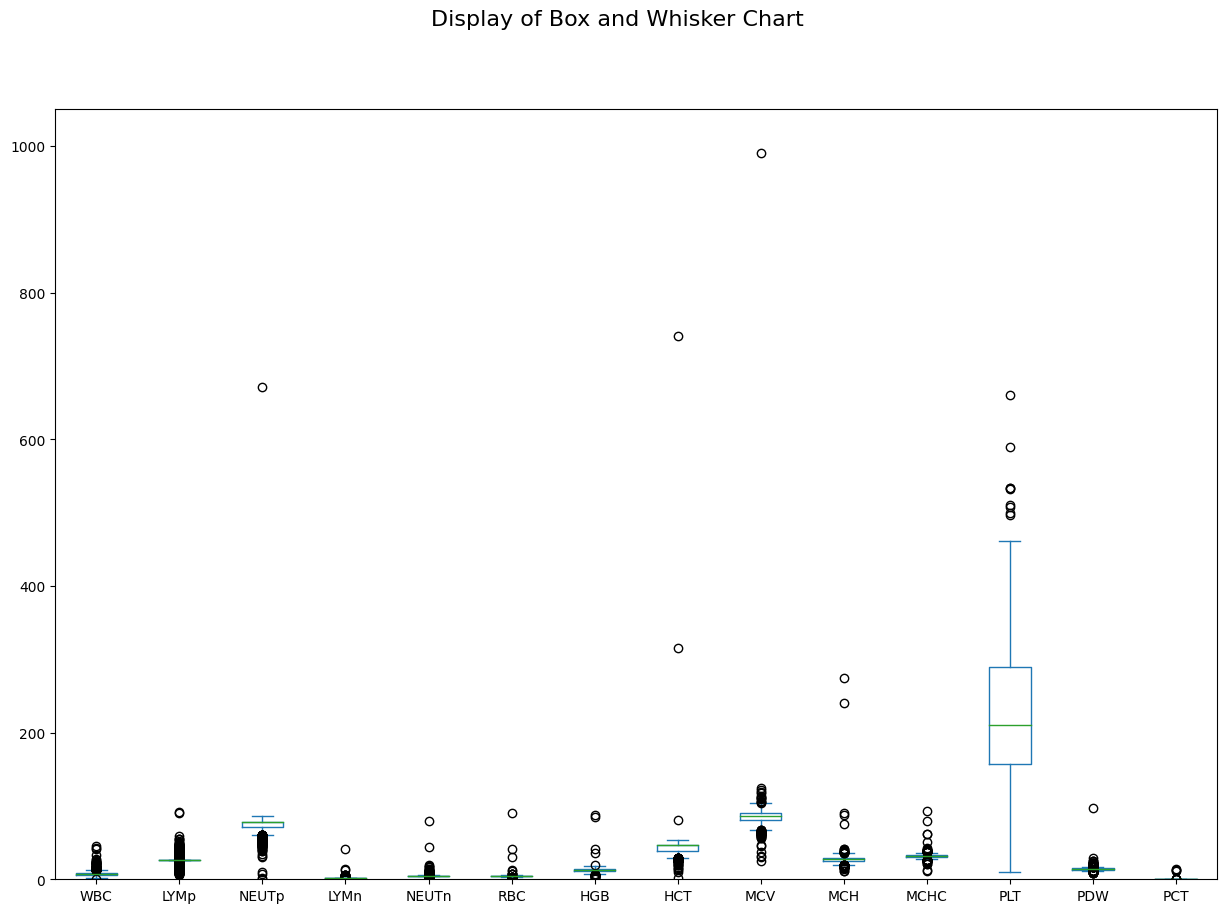

In [13]:
df.drop(['Diagnosis_encoded'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 1050)
plt.suptitle ('Display of Box and Whisker Chart', size=16)

Text(0.5, 0.98, 'Display of augmented box-and-whisker plot')

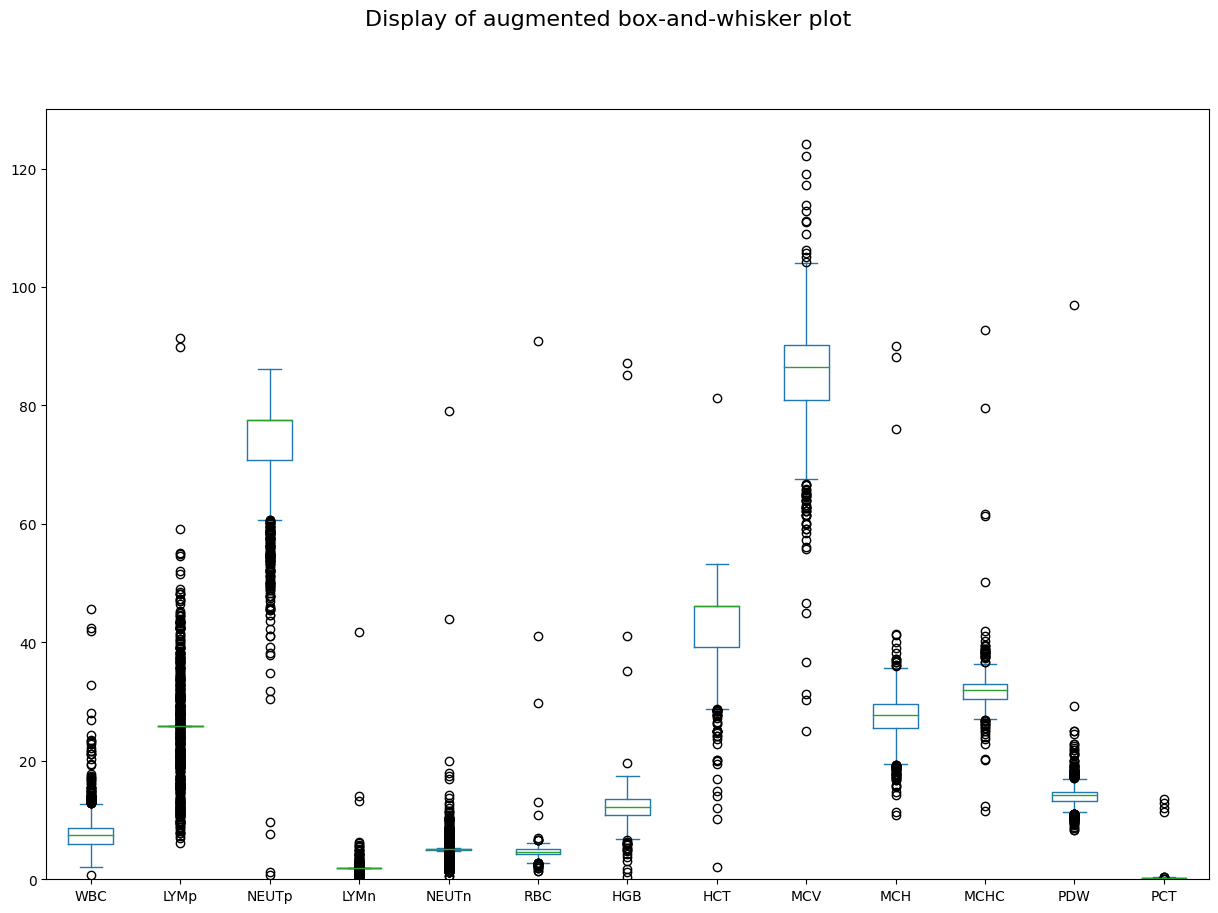

In [14]:
df.drop(['PLT', 'Diagnosis_encoded'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 130)
plt.suptitle ('Display of augmented box-and-whisker plot', size=16)

Text(0.5, 1.0, 'Correlation between variables')

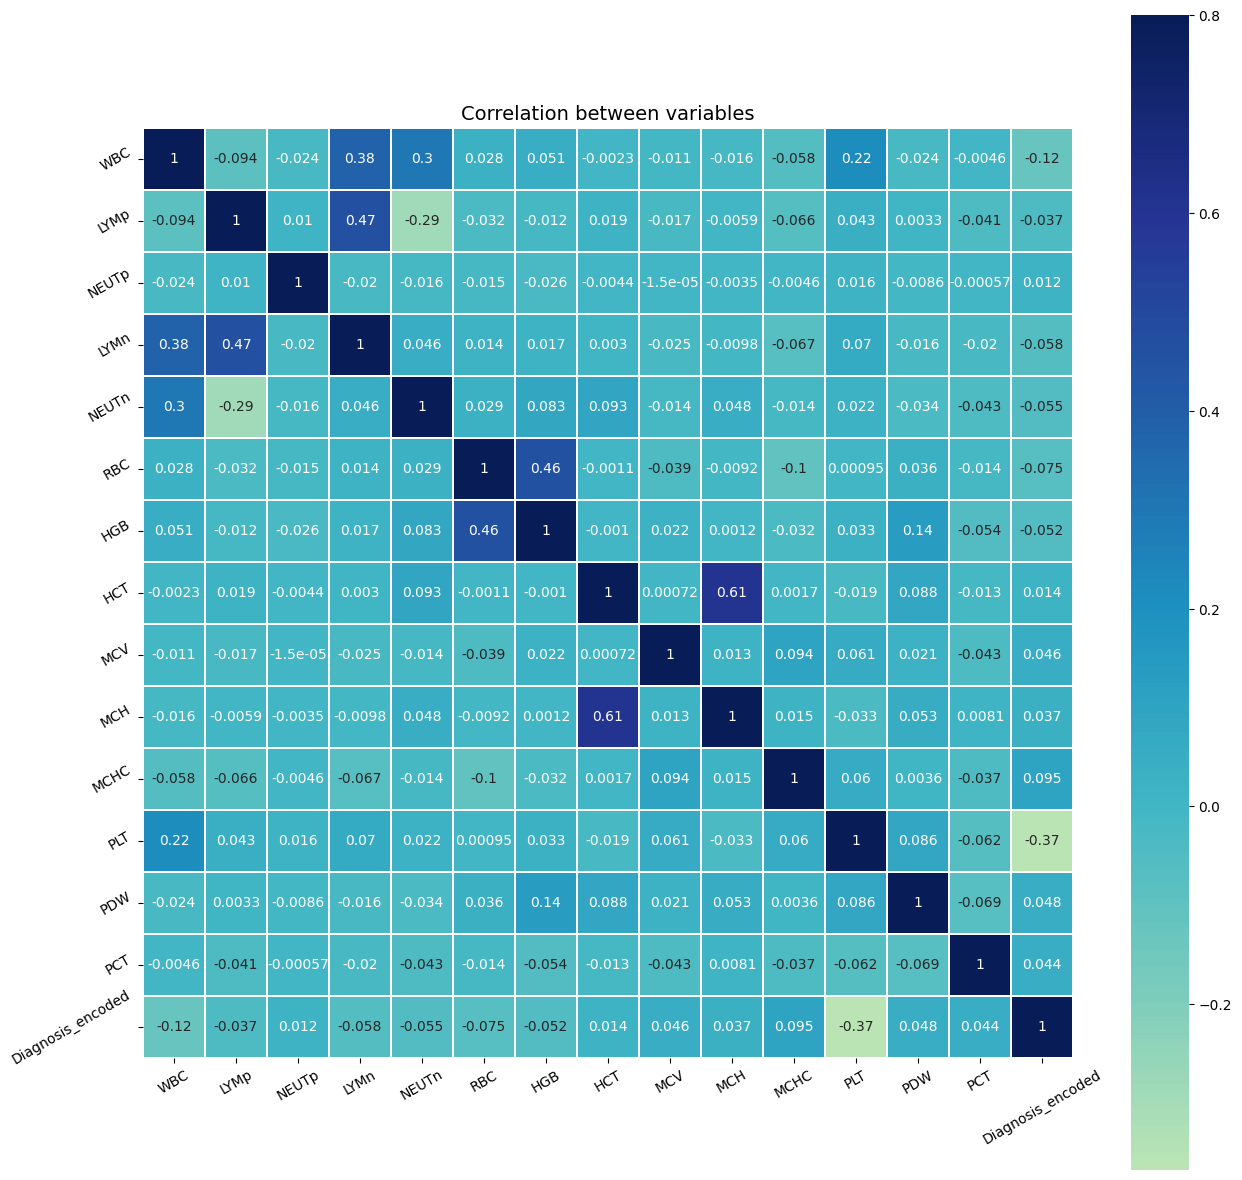

In [15]:
corr= df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.1,
            square=True, annot=True, cmap='YlGnBu',
            center=0, linecolor="white")
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Correlation between variables', size=14)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Diagnosis_encoded'], axis=1), df['Diagnosis_encoded'], test_size=0.2, random_state=42)

In [17]:
decision_tree =  DecisionTreeClassifier()
knn = KNeighborsClassifier()
xgboost = xgb.XGBClassifier()

In [18]:

models = [decision_tree, knn, xgboost]
accuracy_scores = []
y_predictions = []
for model in models:
  model.fit(x_train, y_train)
  y_prediction = model.predict(x_test)
  y_predictions.append(y_prediction)
  accuracy = accuracy_score(y_test, y_prediction)
  accuracy_scores.append(accuracy)
  print(f'Accuracy for {model.__class__.__name__}: {accuracy}')

Accuracy for DecisionTreeClassifier: 0.9959514170040485
Accuracy for KNeighborsClassifier: 0.6720647773279352
Accuracy for XGBClassifier: 0.9919028340080972


<ipython-input-19-cbc72905f885>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')


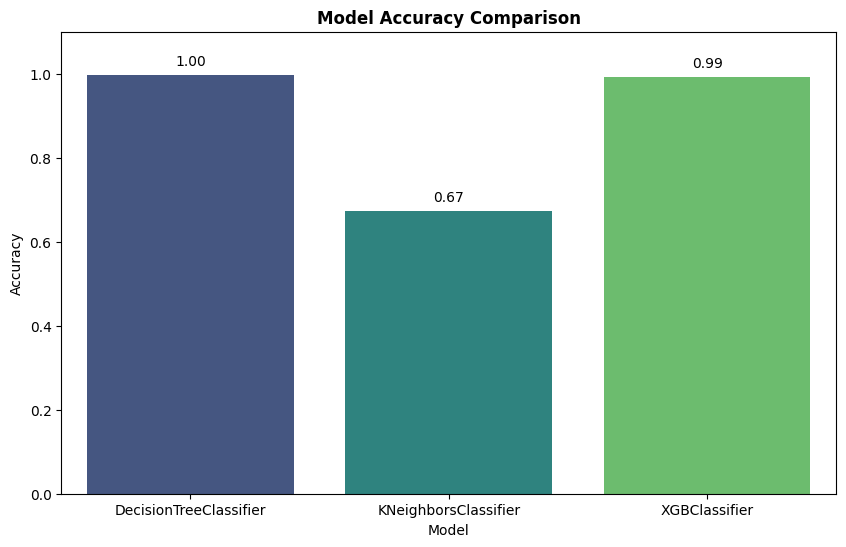

In [19]:
# Nama model
model_names = [model.__class__.__name__ for model in models]
# Membuat DataFrame untuk visualisasi
data = {
    'Model': model_names,
    'Accuracy': accuracy_scores
}
df = pd.DataFrame(data)

# Membuat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')

# Mengatur judul dan label
ax.set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_ylim(0, 1.1)  # Mengatur batas sumbu-y dari 0 hingga 1

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Menampilkan plot
plt.show()